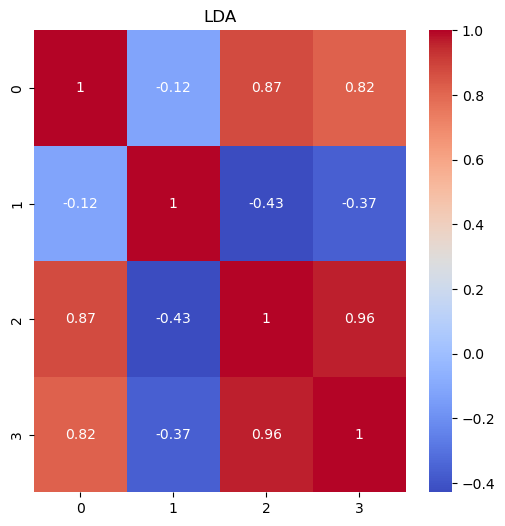

shape of the data (150, 4)
shape of the projected data (150, 2)


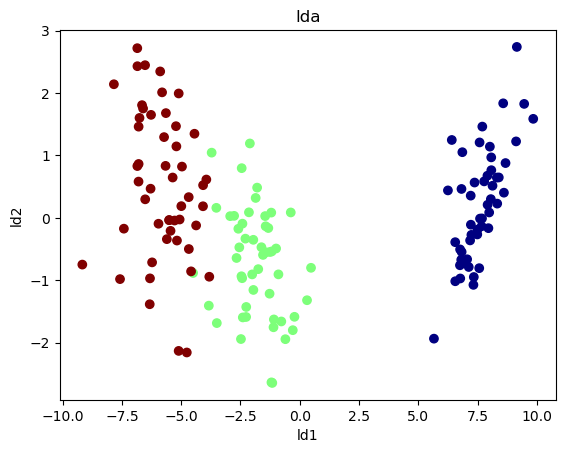

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns

X=load_iris().data
y=load_iris().target

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

corr_matrix=np.corrcoef(X_scaled.T)
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("LDA")
plt.show()

lda=LinearDiscriminantAnalysis(n_components=2)
X_projected=lda.fit_transform(X_scaled,y)

print("shape of the data",X.shape)
print("shape of the projected data",X_projected.shape)

ld1=X_projected[:,0]
ld2=X_projected[:,1]

plt.scatter(ld1,ld2,c=y,cmap='jet')
plt.xlabel("ld1")
plt.ylabel("ld2")
plt.title("lda")
plt.show()




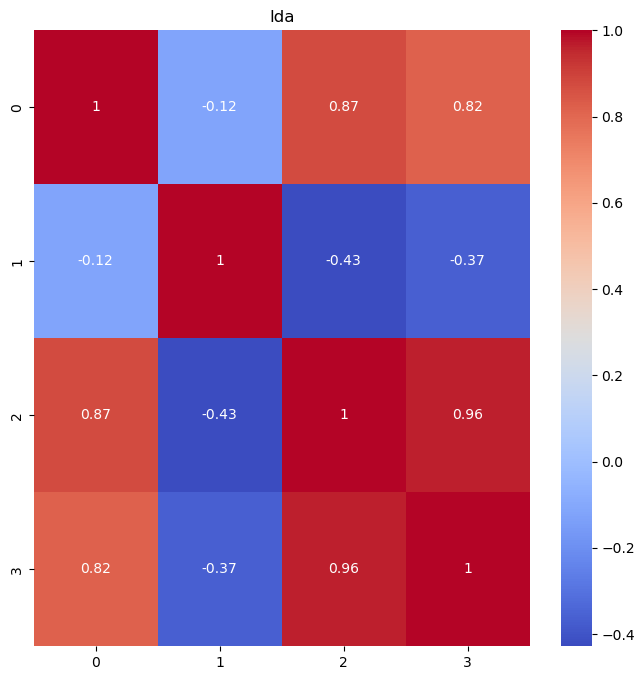

shape: (150, 4)
projected shape (150, 2)


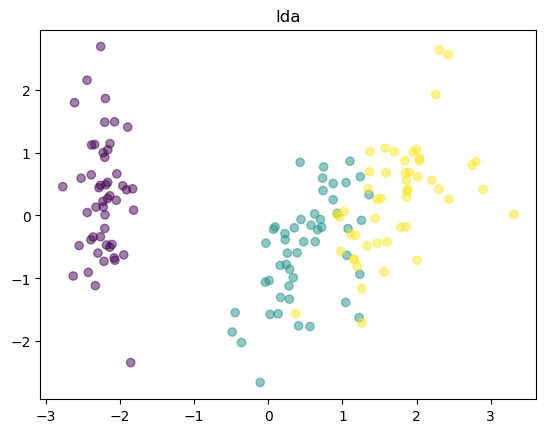

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as SklearnPCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

X=load_iris().data
y=load_iris().target

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

corr_matrix=np.corrcoef(X_scaled.T)
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("lda")
plt.show()

lda=SklearnPCA(n_components=2)
X_projected=lda.fit_transform(X_scaled)

print("shape:",X.shape)
print("projected shape",X_projected.shape)

ld1=X_projected[:,0]
ld2=X_projected[:,1]

plt.scatter(ld1,ld2,c=y,alpha=0.5)
plt.title("lda")
plt.show()

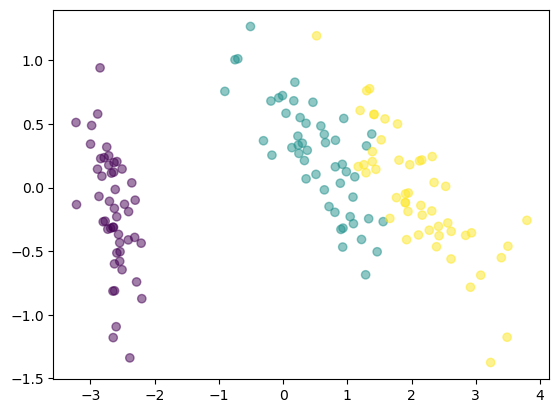

In [5]:
//PCA without using sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X=load_iris().data
y=load_iris().target

class PCA:
    def __init__(self,n_components):
        self.n_components=n_components
        self.components=None
        self.mean=None
        
    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        
        cov=np.cov(X.T)
        
        eigenvalues,eigenvectors=np.linalg.eig(cov)
        
        eigenvectors=eigenvectors.T
        idxs=np.argsort(eigenvalues)[::-1]
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]
        
        self.components=eigenvectors[:self.n_components]
        
    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.components.T)
    
    
pca=PCA(n_components=2)
pca.fit(X)
x_projected=pca.transform(X)

pca1=x_projected[:,0]
pca2=x_projected[:,1]

plt.scatter(pca1,pca2,c=y,alpha=0.5)
plt.show()